In [1]:
# ! pip install yfinance
# installed of 'yfinance' API to gather data from yahoo finance

In [2]:
# python libraries required are imported
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# importing data from the 'Yahoo Finance' using 'y finance' API
bsesn_historic = yf.Ticker('^BSESN')
bsesn_historic_5y = bsesn_historic.history(period = '5y')
# imported the last 5 years historic data of BSE from the Yahoo Finance

bsesn_historic_5y.head() # to get the preview of the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-15 00:00:00+05:30,33670.550781,33670.550781,32923.738281,33228.800781,18400,0.0,0.0
2020-06-16 00:00:00+05:30,33853.718750,34022.011719,32953.300781,33605.218750,27400,0.0,0.0
2020-06-17 00:00:00+05:30,33438.308594,33933.660156,33332.960938,33507.921875,20200,0.0,0.0
2020-06-18 00:00:00+05:30,33371.519531,34276.011719,33371.519531,34208.050781,21200,0.0,0.0
2020-06-19 00:00:00+05:30,34335.378906,34848.371094,34136.390625,34731.730469,27900,0.0,0.0


In [4]:
# currently the column of 'Date' is acting index of the dataframe
# for the purpose of smooth analyses the index of the dataframe are reset
bsesn_5y = bsesn_historic_5y.reset_index()


#columns 'Dividends' and 'Stock Splits' are been removed due to no significat data values
bsesn_5y_a = bsesn_5y.drop(['Dividends', 'Stock Splits'], axis = 1)

# converting the datatype of 'Date' column to the DataTime utilizing "pd.to_datetime"
# removed the timezone data from the column utilizing ".dt.tz_localize(None)" 
# timezone is removed to make data more clear
bsesn_5y_a['Date'] = pd.to_datetime(bsesn_5y_a['Date']).dt.tz_localize(None)

bsesn_5y_a.head() # to get the preview of the data

,Date,Open,High,Low,Close,Volume
0,2020-06-15,33670.550781,33670.550781,32923.738281,33228.800781,18400
1,2020-06-16,33853.718750,34022.011719,32953.300781,33605.218750,27400
2,2020-06-17,33438.308594,33933.660156,33332.960938,33507.921875,20200
3,2020-06-18,33371.519531,34276.011719,33371.519531,34208.050781,21200
4,2020-06-19,34335.378906,34848.371094,34136.390625,34731.730469,27900


In [5]:
# created the list variable "union_budget_dates' consisting of the daes at union budget is released
union_budget_dates = [ '2021-02-01', '2022-02-01', '2023-02-01', '2024-02-01', '2025-02-01' ]

# contervet the datatype to datetime of variable 'union_budget_dates' utilizing"pd.to_datetime"
union_budget_dates = pd.to_datetime(union_budget_dates)

print(union_budget_dates)

DatetimeIndex(['2021-02-01', '2022-02-01', '2023-02-01', '2024-02-01',
               '2025-02-01'],
              dtype='datetime64[ns]', freq=None)


In [6]:
# for the calculation of the Exponential Moving Average for the dataframe 'bsesn_5y_a'

# created a copy of data set, calulation of EMA with span = 3 is done on the newly created copy.
bsesn_ema3 = bsesn_5y_a.copy() 

for col in bsesn_5y_a.columns:
    if col != 'Date':
        bsesn_ema3[f'{col}_EMA3'] = bsesn_5y_a[col].ewm(span = 3, adjust = False).mean()

In [7]:
# droped the non Exponential Moving Average data columns.
## done to increse the tidyness of the dataframe
bsesn_ema3 = bsesn_ema3.drop(['Open', 'Close', 'Low', 'High', 'Volume'], axis = 1)

bsesn_ema3.head() # preview of the updated dataframe

,Date,Open_EMA3,High_EMA3,Low_EMA3,Close_EMA3,Volume_EMA3
0,2020-06-15,33670.550781,33670.550781,32923.738281,33228.800781,18400.0
1,2020-06-16,33762.134766,33846.281250,32938.519531,33417.009766,22900.0
2,2020-06-17,33600.221680,33889.970703,33135.740234,33462.465820,21550.0
3,2020-06-18,33485.870605,34082.991211,33253.629883,33835.258301,21375.0
4,2020-06-19,33910.624756,34465.681152,33695.010254,34283.494385,24637.5


In [8]:
# creating a dictonary to enter the filtered data as the dates
filtered_bsesn_ema3 = {}

# utilizing the for loops to avoid the repretition of the task and filter the data between the dates fortnight before and after of the announcememt of union budget.
for date in union_budget_dates:
    start = date - pd.Timedelta(days = 14)
    end = date + pd.Timedelta(days = 14)
    bsesn_ema3_a = (bsesn_ema3['Date'] >= start) & (bsesn_ema3['Date'] <= end)
    filtered_bsesn_ema3[f'bsesn_{date.year}'] = bsesn_ema3[bsesn_ema3_a]

# [OPTIONAL]
# # preview of the filtered data
# print(filtered_bsesn_ema3)

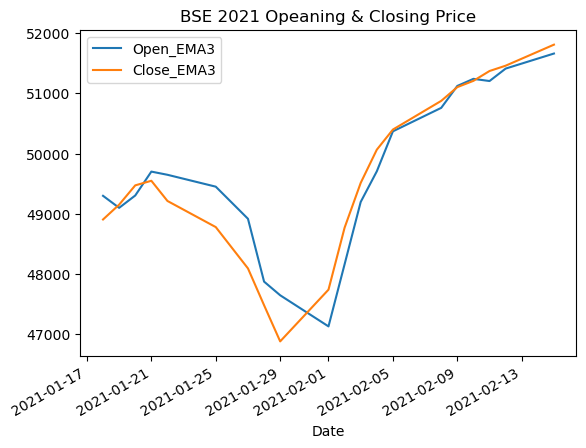

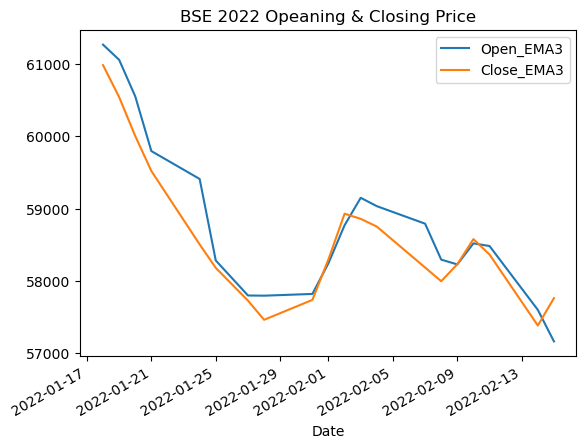

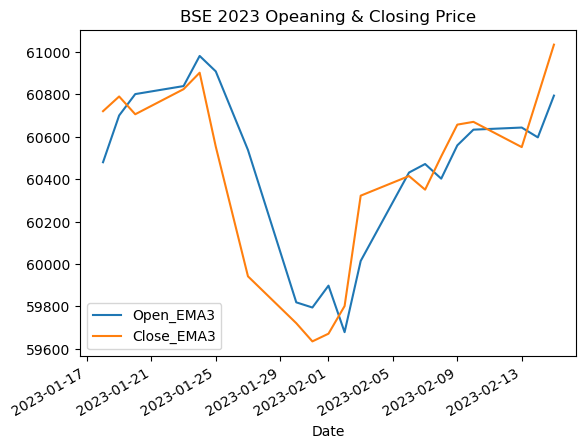

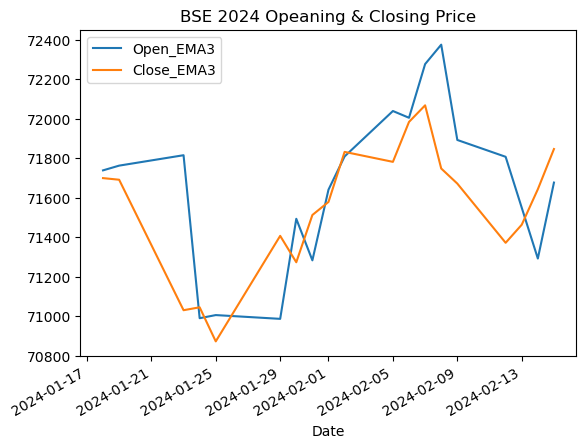

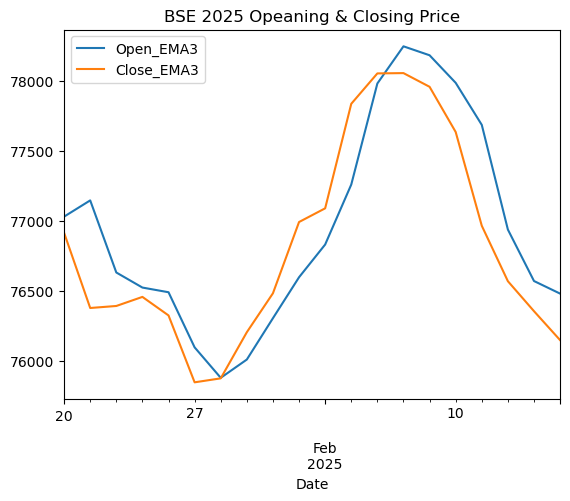

In [12]:
# creating graphical representation plots of OPENING & CLOSING PRICE for the filtered data

for year in range(2021,2026):
    plot_ema3_df = filtered_bsesn_ema3[f'bsesn_{year}']
    plot_ema3 = plot_ema3_df.plot(x = 'Date', y = ['Open_EMA3', 'Close_EMA3'], title = f'BSE {year} Opeaning & Closing Price')
    fig = plot_ema3.get_figure()                                                # converting the ploted graphical representation into the figure
    fig.savefig(f"BSE_{year}_EMA3_Fortnight_O&C.png", dpi=300, bbox_inches='tight') # exporting the ploted graphical representation for further use
    # plt.close(fig) # [OPTIONAL] # Closing figures to free memory.

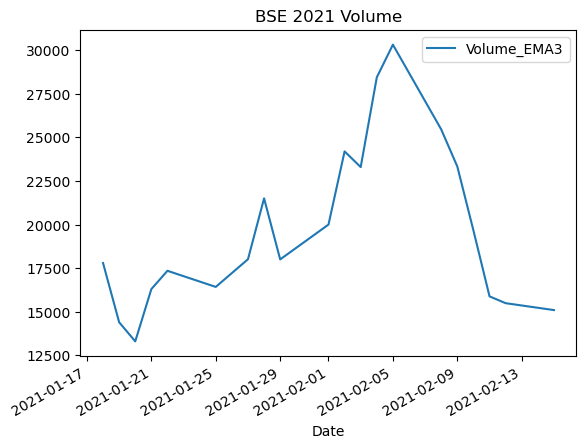

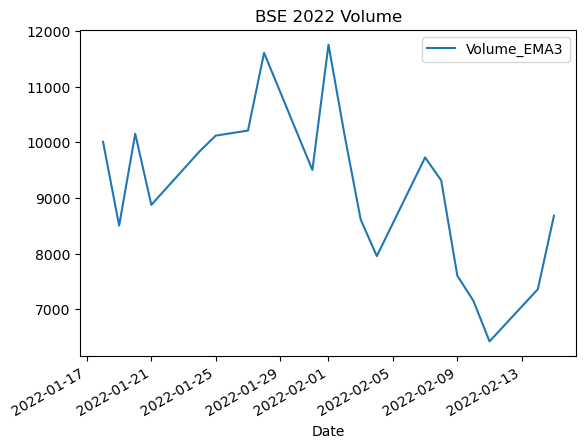

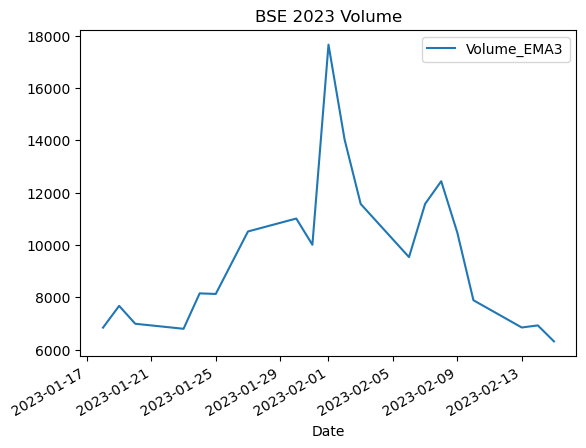

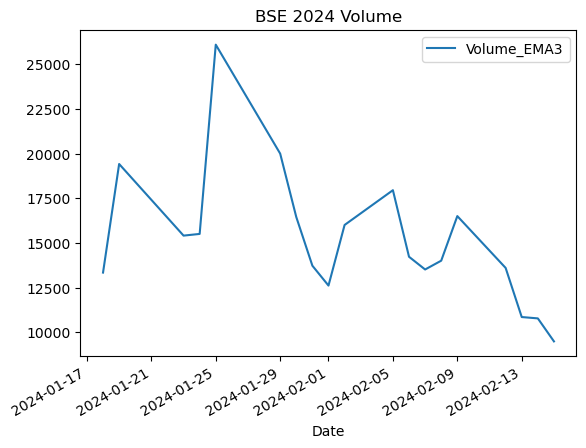

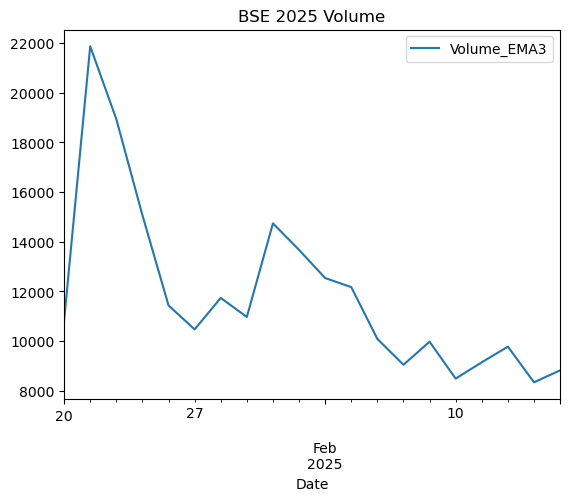

In [11]:
# creating the graphical representaion of VOLUME trade for the filtered data

for year in range(2021,2026):
    plot_ema3_df = filtered_bsesn_ema3[f'bsesn_{year}']
    plot_ema3 = plot_ema3_df.plot(x = 'Date', y = ['Volume_EMA3'], title = f'BSE {year} Volume')
    fig = plot_ema3.get_figure()                                                # converting the ploted graphical representation into the figure
    fig.savefig(f"BSE_{year}_EMA3_Fortnight_Vol.png", dpi=300, bbox_inches='tight') # exporting the ploted graphical representation for further use
    # plt.close(fig) # [OPTIONAL] # Closing figures to free memory.
